# The Sparks Foundation

## Domain - Data Science and Business Analytics
## Batch - November 2021
### Author - Deep Ranjan Guha

  
      Copyright  Deep Ranjan Guha,2021

#### Task 5 - Exploratory Data Analysis - Sports

#### Dataset - https://bit.ly/34SRn3b

In [9]:
# importing the required libraries:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

pd.options.display.max_rows = None
  
pd.options.display.float_format = '{:.6f}'.format

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the dataset:

In [10]:
data=pd.read_csv('/Users/deepranjanguha/Desktop/Data Science /Sparks Foundation/Datasets/Indian Premier League/matches.csv')
df_deliveries=pd.read_csv('/Users/deepranjanguha/Desktop/Data Science /Sparks Foundation/Datasets/Indian Premier League/deliveries.csv')
data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
df_deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
print(data.info(),'\n') # Checking the info of matches.csv
print(df_deliveries.info(),'\n')  # Checking the info of deliveries.csv
print('\n','Shape of matches.csv : ',data.shape,'\n')  # Checking the shape
print('\n','Shape of deliveries.csv : ',df_deliveries.shape,'\n')  # Checking the shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

For matches dataset:

* The no of records : 756
* The no of attributes : 18

For deliveries dataset:

* The no of records : 179078
* The no of attributes : 21

In [13]:
data.describe().T  # Checking the 5 point summary

,count,mean,std,min,25%,50%,75%,max
id,756.000000,1792.178571,3464.478148,1.000000,189.750000,378.500000,567.250000,11415.000000
season,756.000000,2013.444444,3.366895,2008.000000,2011.000000,2013.000000,2016.000000,2019.000000
dl_applied,756.000000,0.025132,0.156630,0.000000,0.000000,0.000000,0.000000,1.000000
win_by_runs,756.000000,13.283069,23.471144,0.000000,0.000000,0.000000,19.000000,146.000000
win_by_wickets,756.000000,3.350529,3.387963,0.000000,0.000000,4.000000,6.000000,10.000000


In [14]:
df_deliveries.describe().T  # Checking the 5 point summary

,count,mean,std,min,25%,50%,75%,max
match_id,179078.000000,1802.252957,3472.322805,1.000000,190.000000,379.000000,567.000000,11415.000000
inning,179078.000000,1.482952,0.502074,1.000000,1.000000,1.000000,2.000000,5.000000
over,179078.000000,10.162488,5.677684,1.000000,5.000000,10.000000,15.000000,20.000000
ball,179078.000000,3.615587,1.806966,1.000000,2.000000,4.000000,5.000000,9.000000
is_super_over,179078.000000,0.000452,0.021263,0.000000,0.000000,0.000000,0.000000,1.000000
wide_runs,179078.000000,0.036721,0.251161,0.000000,0.000000,0.000000,0.000000,5.000000
bye_runs,179078.000000,0.004936,0.116480,0.000000,0.000000,0.000000,0.000000,4.000000
legbye_runs,179078.000000,0.021136,0.194908,0.000000,0.000000,0.000000,0.000000,5.000000
noball_runs,179078.000000,0.004183,0.070492,0.000000,0.000000,0.000000,0.000000,5.000000
penalty_runs,179078.000000,0.000056,0.016709,0.000000,0.000000,0.000000,0.000000,5.000000


#### Numerical and Categorical Features:

In [15]:
# For matches dataset:
data_num=data.select_dtypes(np.number)
data_cat=data.select_dtypes(object)
print('The numerical features : ')
print(data_num.columns,'\n')
print('The categorical features : ')
print(data_cat.columns)

The numerical features : 
Index(['id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets'], dtype='object') 

The categorical features : 
Index(['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [16]:
# For deliveries dataset:
df_num=df_deliveries.select_dtypes(np.number)
df_cat=df_deliveries.select_dtypes(object)
print('The numerical features : ')
print(df_num.columns,'\n')
print('The categorical features : ')
print(df_cat.columns)

The numerical features : 
Index(['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object') 

The categorical features : 
Index(['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')


#### Checking and treating duplicate values:

In [17]:
# Checking the number of duplicate entries
print('Number of duplicate entries : ',data.duplicated().sum(),'\n')

Number of duplicate entries :  0 



* Hence there are no duplicate records that exist in the dataset.

#### Checking the symmetry of the data:

In [10]:
data.skew()

id               2.011636
season           0.060337
dl_applied       6.079627
win_by_runs      2.551532
win_by_wickets   0.270236
dtype: float64

* ``dl_applied`` and ``win_by_runs`` has high postive skewness.

#### Checking the presence and treatment of Null/Missing Values:

In [11]:
count=data.isna().sum()
percent=((count/data.shape[0])*100)
null=pd.DataFrame(pd.concat([count,percent],keys=['Missing values','% Missing values'],axis=1))
null

,Missing values,% Missing values
id,0,0.000000
season,0,0.000000
city,7,0.925926
date,0,0.000000
team1,0,0.000000
team2,0,0.000000
toss_winner,0,0.000000
toss_decision,0,0.000000
result,0,0.000000
dl_applied,0,0.000000


* ``umpire3`` has 84% missing values.
* ``umpire2``,``umpire1``,``player_of_match``,``winner``,``city`` also have missing values.

In [12]:
# dropping umpire3 with 84% null values:
data=data.drop(['id','umpire3'],axis=1)

In [13]:
# dropping the null/missing values in umpire2,umpire1,player_of_match,winner,city
data=data.dropna(axis=0)
print('Shape after dropping null/missing values : ',data.shape)

Shape after dropping null/missing values :  (743, 16)


#### Data Visualisations:

City wise Number of matches played:

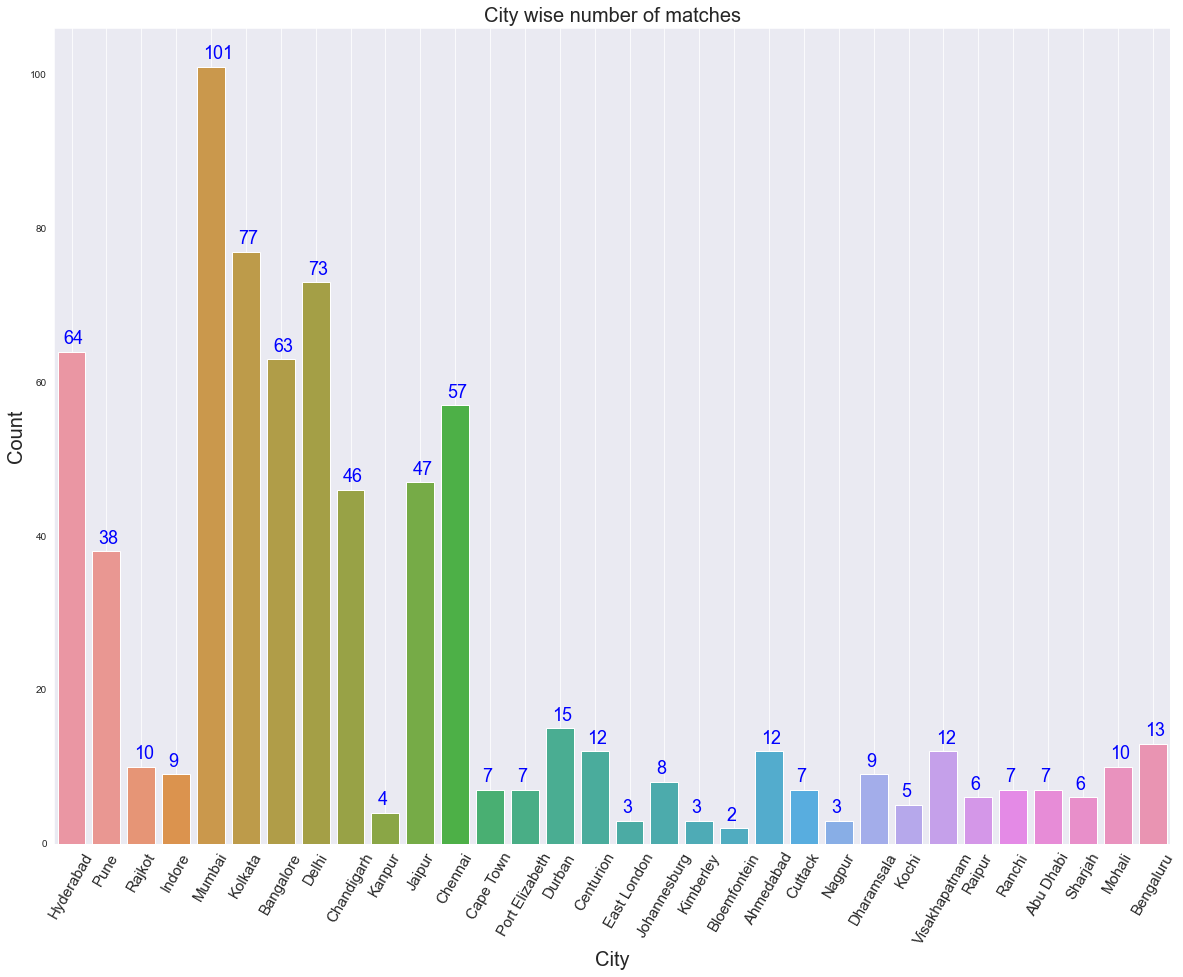

In [66]:
plt.figure(figsize=(20,15))
ax=sns.countplot(data['city'])
sns.set_style('darkgrid')
plt.title('City wise number of matches',fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid()
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.18,i.get_height()+1),color='blue',
                fontsize=18)
plt.show()

* The city of Mumbai has hosted the maximum number of matches i.e 101 matches.

Season wise Number of matches played:

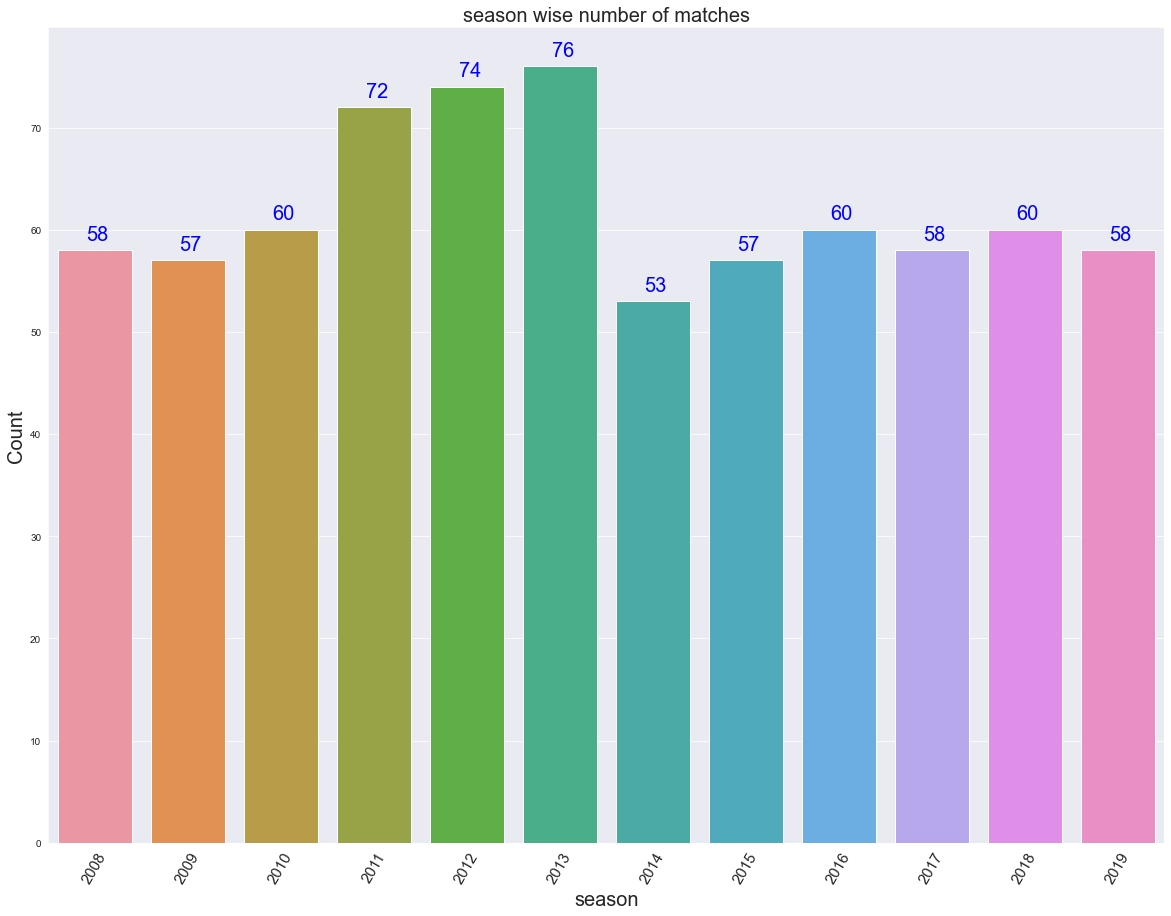

In [65]:
plt.figure(figsize=(20,15))
ax=sns.countplot(data['season'])
sns.set_style('darkgrid')
plt.title('season wise number of matches',fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('season',fontsize=20)
plt.ylabel('Count',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.31,i.get_height()+1),color='blue',
                fontsize=20)
plt.show()

* In 2013, the maximum number of matches i.e 76 matches have been recorded.

Number of times a team has won the toss:

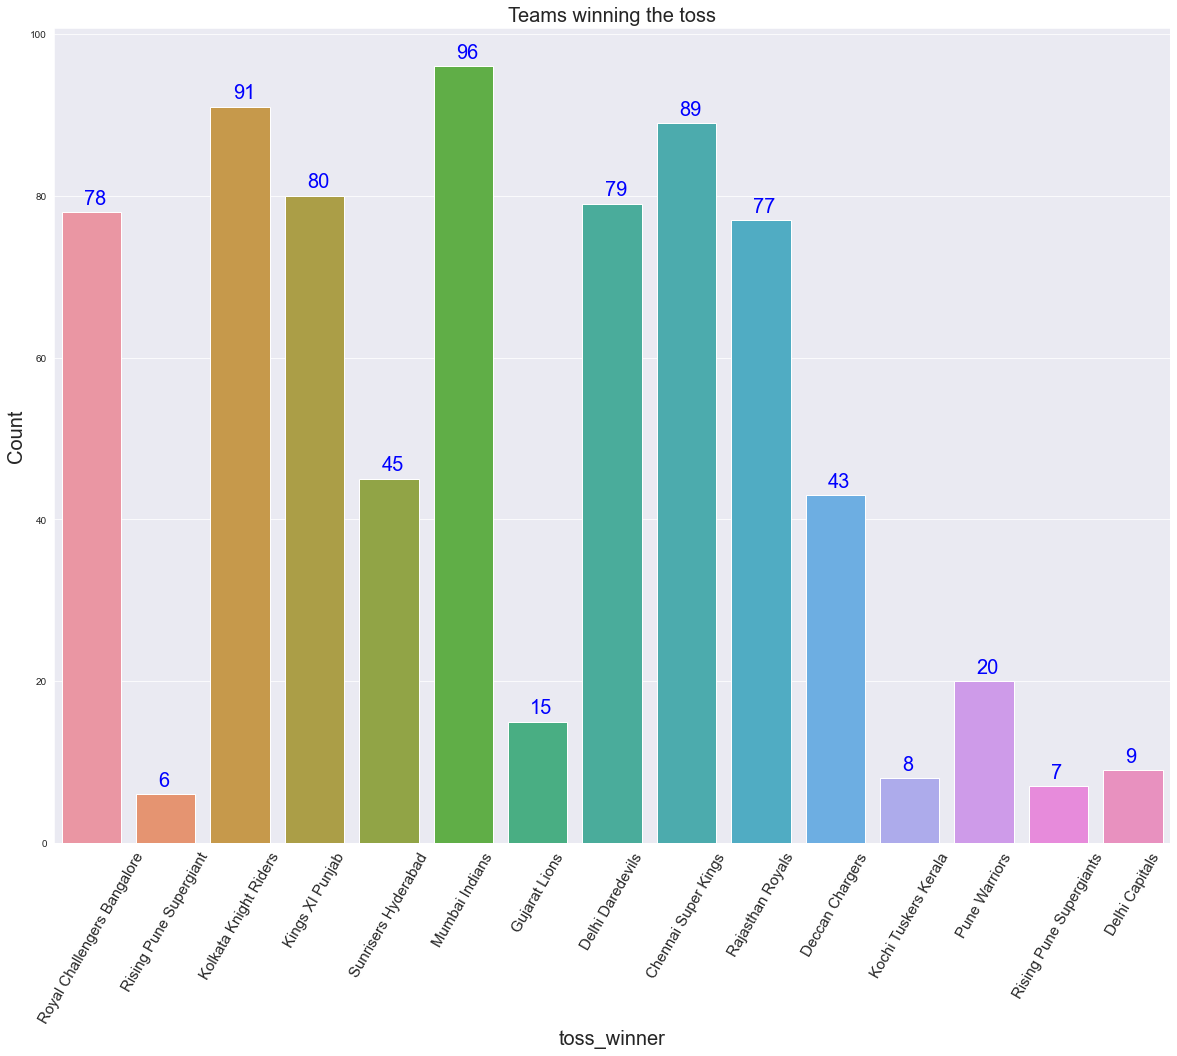

In [64]:
plt.figure(figsize=(20,15))
ax=sns.countplot(data['toss_winner'])
sns.set_style('darkgrid')
plt.title('Teams winning the toss',fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('toss_winner',fontsize=20)
plt.ylabel('Count',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='blue',
                fontsize=20)
plt.show()

* Mumbai Indians has won the maximum toss results. They have won 96 tosses.

Number of wins by a team:

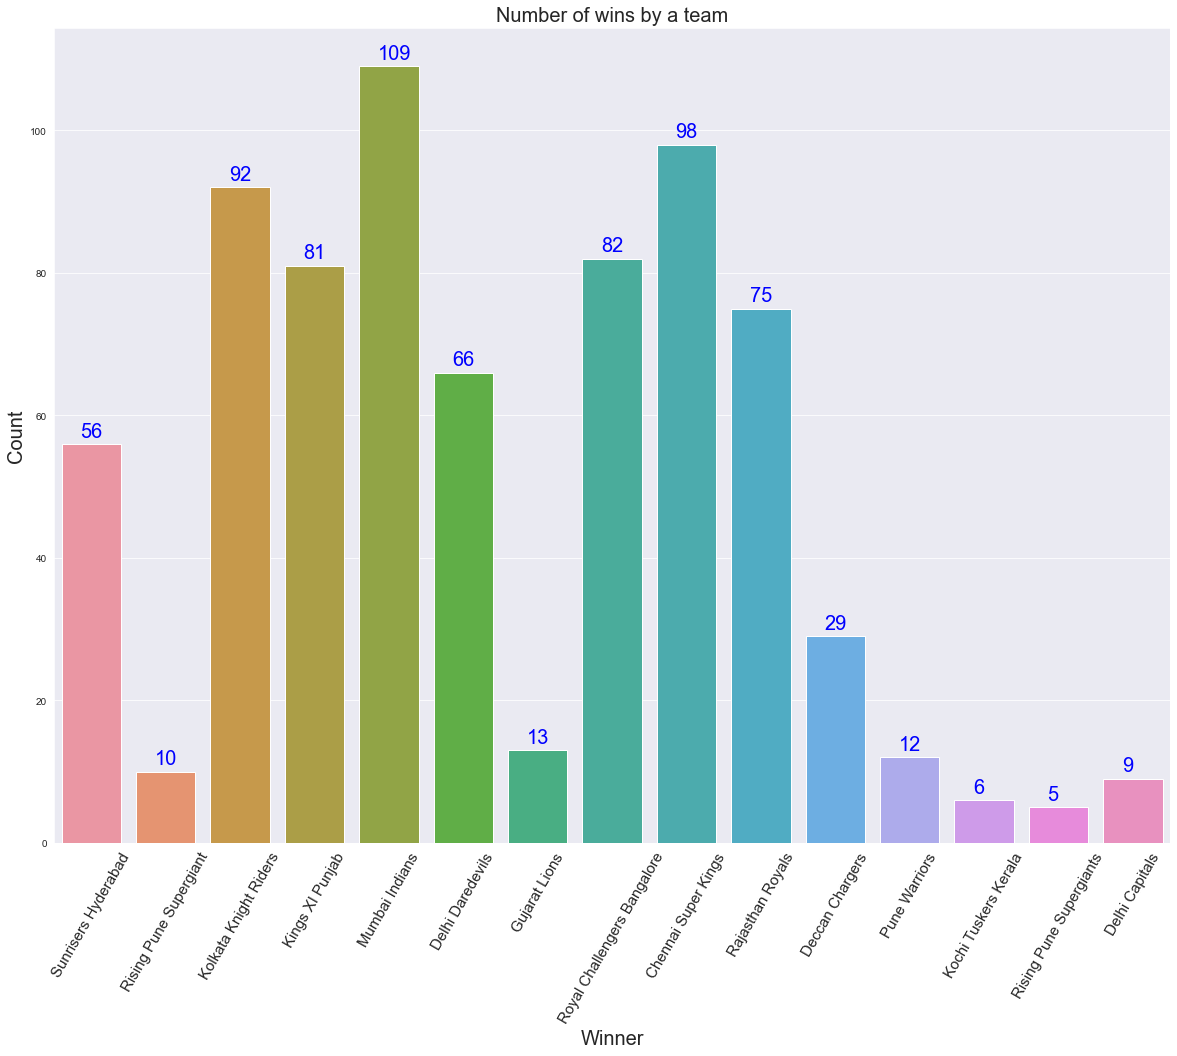

In [63]:
plt.figure(figsize=(20,15))
ax=sns.countplot(data['winner'])
sns.set_style('darkgrid')
plt.title('Number of wins by a team',fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('Winner',fontsize=20)
plt.ylabel('Count',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.25,i.get_height()+1),color='blue',
                fontsize=20)
plt.show()

* Mumbai Indians has won the maximum number of times. They have won 109 times.

Matches played as per top 10 Venues:

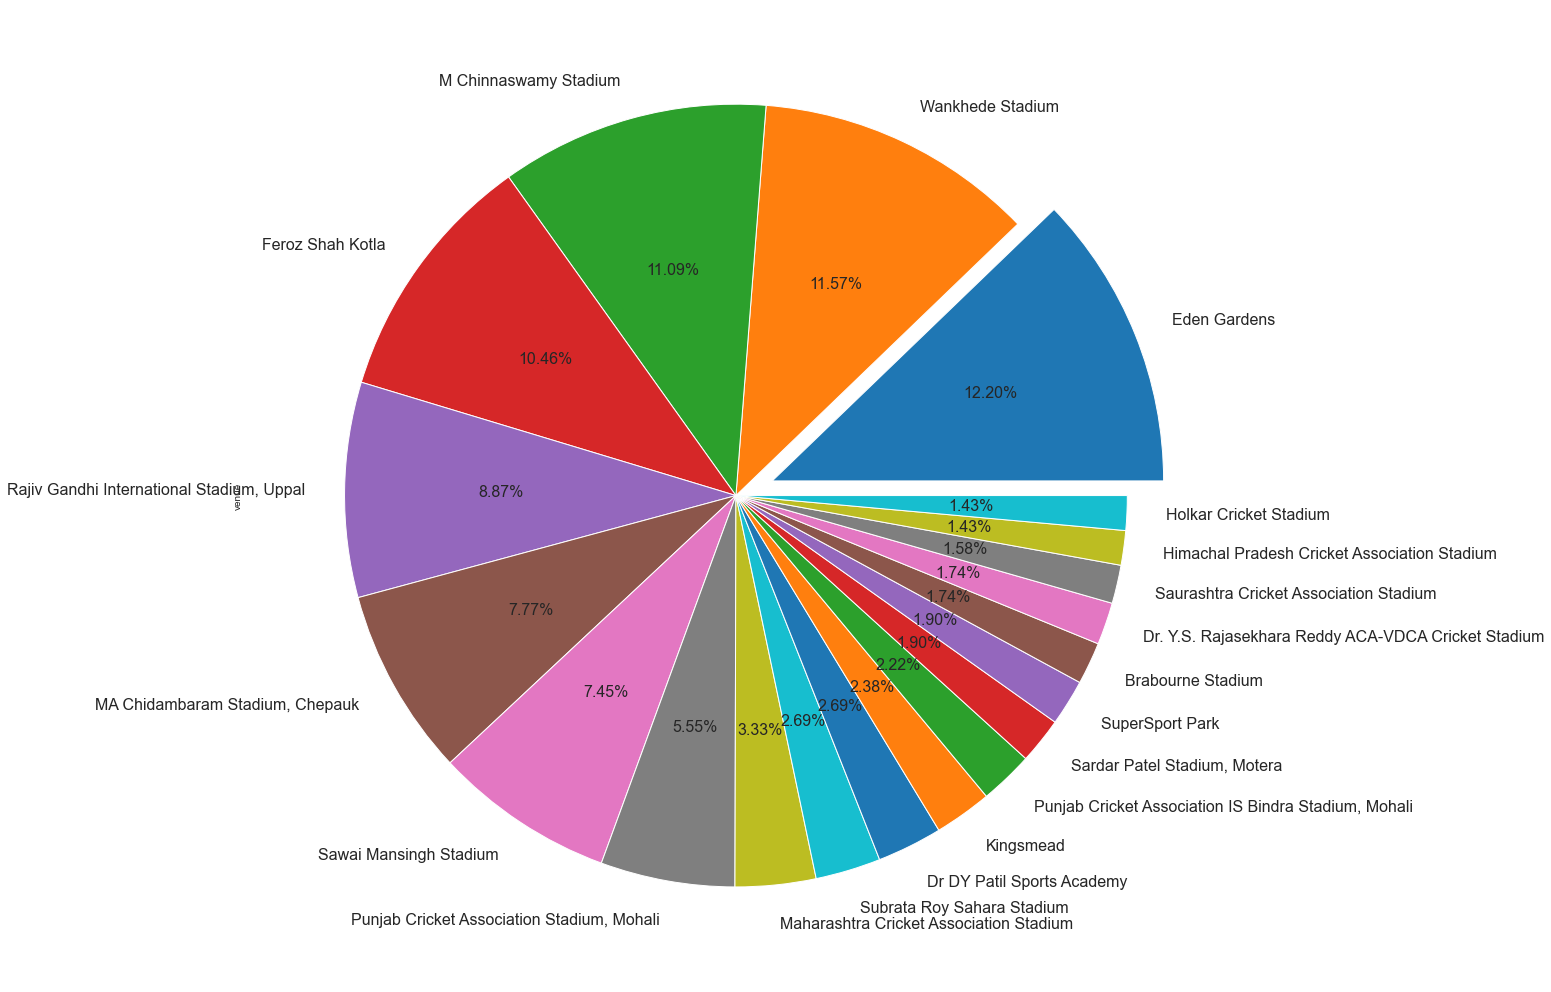

In [107]:
plt.figure(figsize=(20,18))
explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
data['venue'].value_counts().head(20).plot(kind='pie',autopct='%0.2f%%',explode=explode,fontsize=16)
plt.show()

* The maximum 12.20% of the matches have been played in The Eden Gardens.
* The second highest is the Wankhede Stadium.

Player of the match winners as per top 20 players:

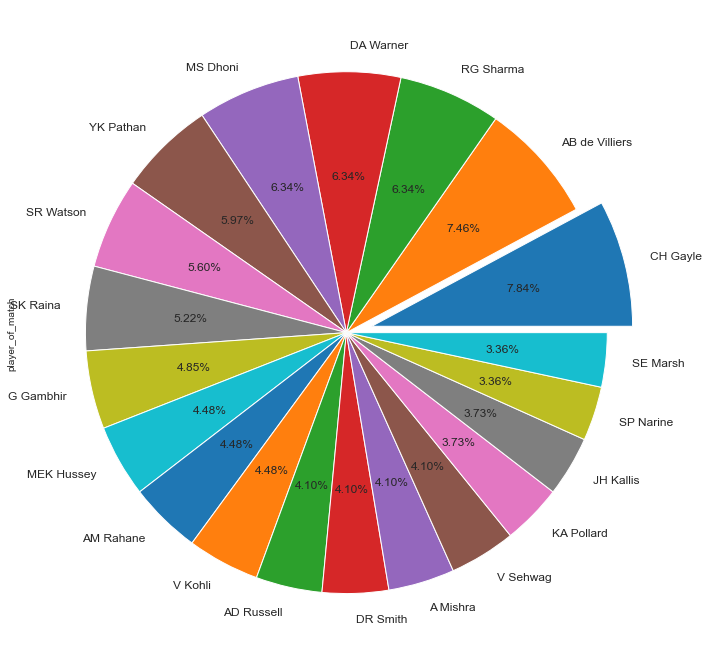

In [104]:
plt.figure(figsize=(16,12))
explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
data['player_of_match'].value_counts().head(20).plot(kind='pie',autopct='%0.2f%%',explode=explode,fontsize=12)
plt.show()

* CH Gayle has won maximum Player of the match awards.
* AB de Villiers has won the second highest Player of the match awards.

Toss Decisions made:

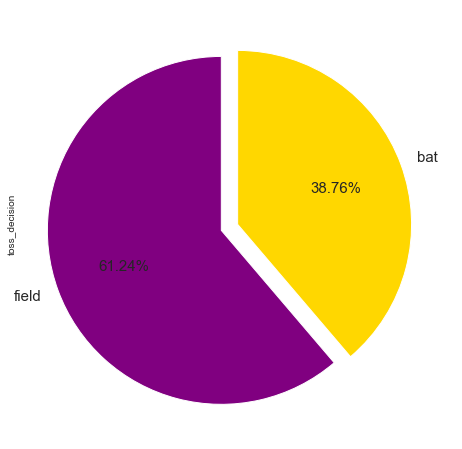

In [153]:
plt.figure(figsize=(10,8))
explode=[0.1,0.0]
data['toss_decision'].value_counts().plot(kind='pie',autopct='%0.2f%%',colors=['purple','gold'],
                                                   explode=explode,fontsize=15,startangle=90)
plt.show()

* Majority of the toss decision has been to field.

Type of result:

normal    734
tie         9
Name: result, dtype: int64


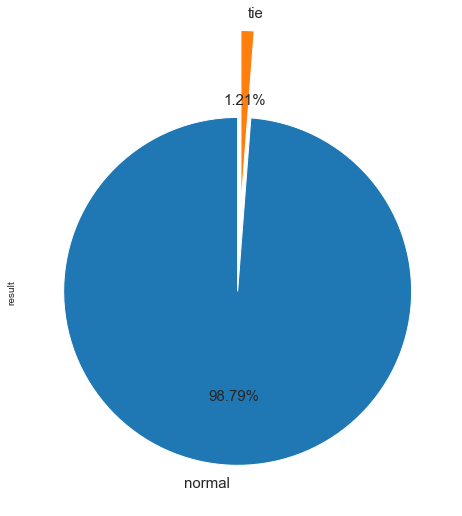

In [154]:
plt.figure(figsize=(10,8))
explode=[0.0,0.5]
print(data['result'].value_counts())
data['result'].value_counts().plot(kind='pie',autopct='%0.2f%%',
                                                   explode=explode,fontsize=15,startangle=90)
plt.show()

* Only 9 matches out of 743 have a result as a tie.

Winners of each season:

In [147]:
win=data.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
win.sort_values(by='season',ascending=True)

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


* Hence the above table shows the winners of the Tournaments from Season 1 to season 11.

Seasonal Toss decision:

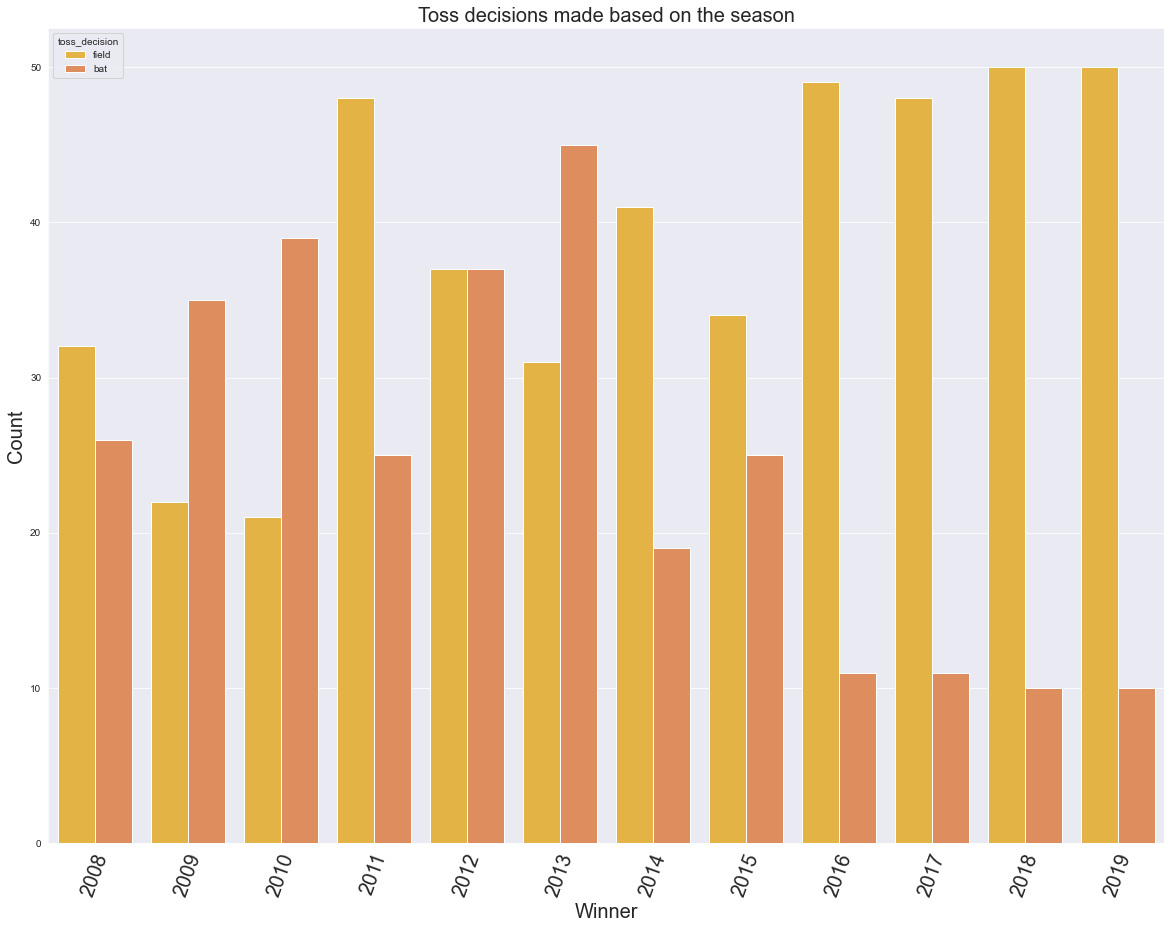

In [214]:
# Toss decisions made based on the season:
plt.figure(figsize=(20,15))
sns.set_palette(palette='plasma_r')
sns.countplot(x='season',hue='toss_decision',data=data)
plt.title('Toss decisions made based on the season',fontsize=20)
plt.xticks(rotation=70,fontsize=20)
plt.xlabel('Winner',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

* In 2012,equal number of both the decisions were made.
* In 2009,2010,2013 majority of the toss decisions were to bat.
* Remaing all seasons had fielding as the maximum decisions made after winning the toss.

#### Looking at the next dataset:

In [122]:
df_deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


Top run scorers in IPL:

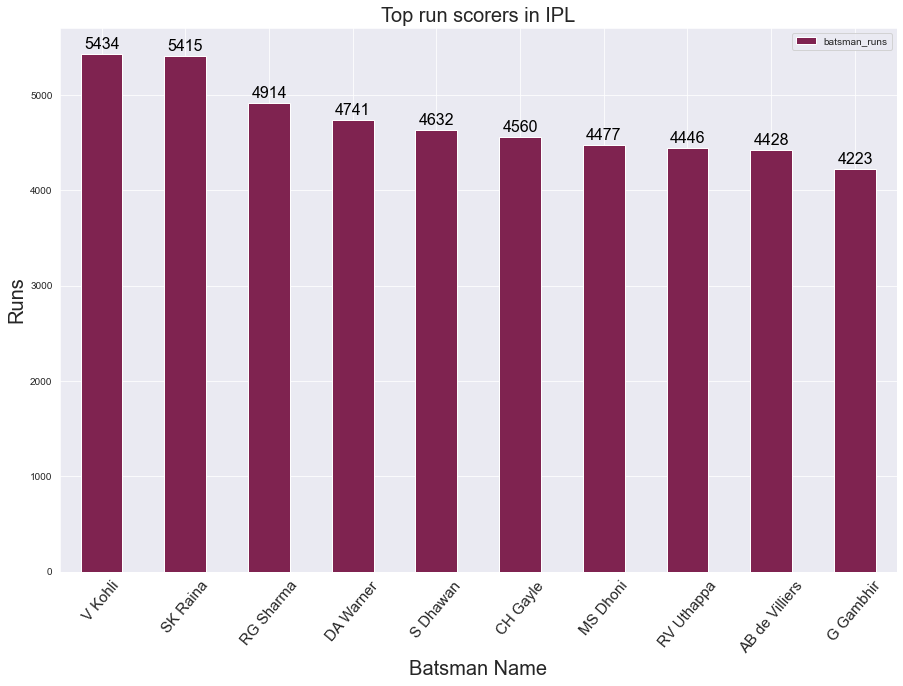

In [95]:
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('darkgrid')
sns.set_palette(palette='twilight_shifted_r')
df_new=df_deliveries.groupby(['batsman'])[['batsman_runs']].sum()
ax=df_new.sort_values(by='batsman_runs',ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=50,fontsize=15)
plt.ylabel('Runs',fontsize=20)
plt.xlabel('Batsman Name',fontsize=20)
plt.title('Top run scorers in IPL',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.04,i.get_height()+55),color='black',
                fontsize=16)
plt.show()

* V Kohli has scored 5434 runs which is the maximum runs scored by a batsman.
* SK Raina has scored 5415 runs which is the second highest runs scored by a batsman
* RG Sharma has scored 4914 runs and takes the third place.
* DA Warner has scored 4741 runs and takes the fourth place.

Top boundary scorers in IPL:

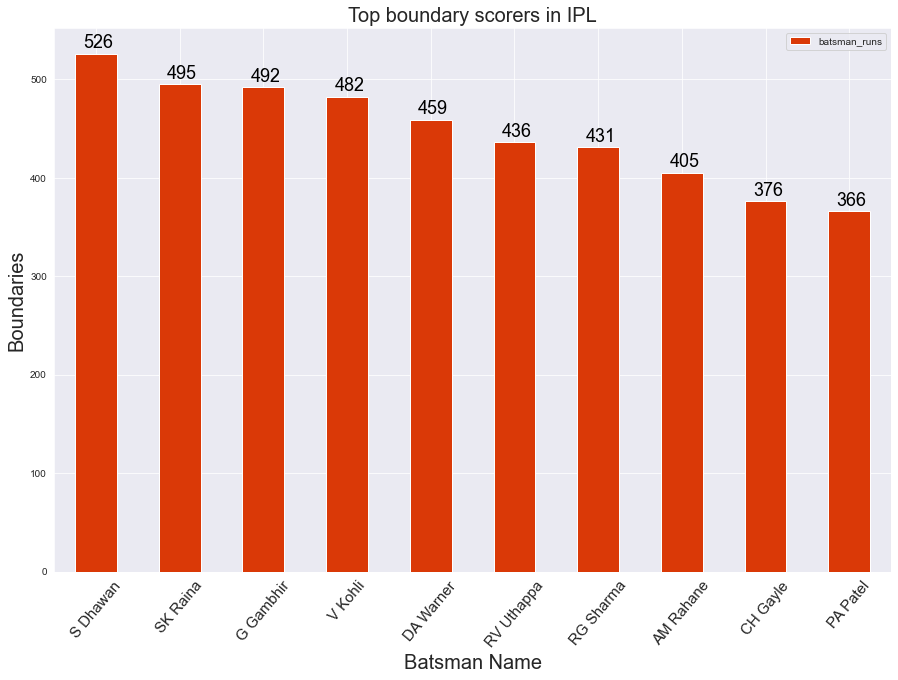

In [179]:
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('darkgrid')
sns.set_palette(palette='turbo_r')
df_new=df_deliveries.groupby(['batsman'])[['batsman_runs']].agg(lambda x: (x==4).sum())
ax=df_new.sort_values(by='batsman_runs',ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=50,fontsize=15)
plt.ylabel('Boundaries',fontsize=20)
plt.xlabel('Batsman Name',fontsize=20)
plt.title('Top boundary scorers in IPL',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.1,i.get_height()+6),color='black',
                fontsize=18)
plt.show()

* S Dhawan has hitted the maximum number of boundaries in fours.
* SK Raina has the second place with maximum boundaries as fours.

Top 6 hitters in IPL:

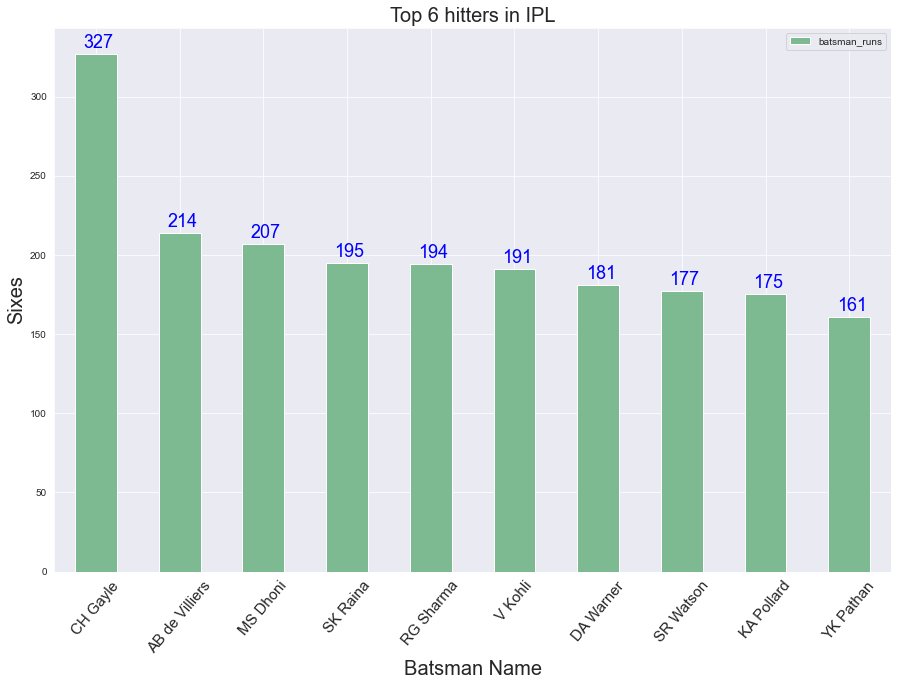

In [180]:
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('darkgrid')
sns.set_palette(palette='crest')
df_new=df_deliveries.groupby(['batsman'])[['batsman_runs']].apply(lambda x: (x==6).sum())
ax=df_new.sort_values(by='batsman_runs',ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=50,fontsize=15)
plt.ylabel('Sixes',fontsize=20)
plt.xlabel('Batsman Name',fontsize=20)
plt.title('Top 6 hitters in IPL',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.1,i.get_height()+4),color='blue',
                fontsize=18)
plt.show()

* CH Gayle has hitted 327 which is the maximum number of sixes hitted by a batsman.
* AB de Villiers has the second place 214 sixes.
* MS Dhoni has the third place with 207 sixes.

Top Bowlers in IPL:

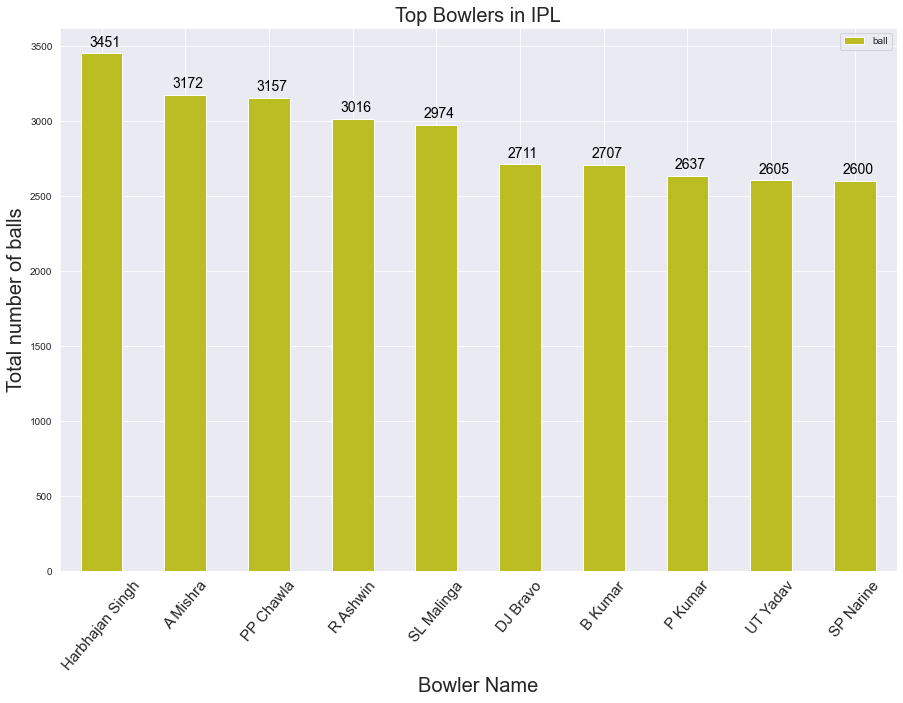

In [185]:
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('darkgrid')
sns.set_palette(palette='tab10_r')
df_new=df_deliveries.groupby(['bowler'])[['ball']].count()
ax=df_new.sort_values(by='ball',ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=50,fontsize=15)
plt.ylabel('Total number of balls',fontsize=20)
plt.xlabel('Bowler Name',fontsize=20)
plt.title('Top Bowlers in IPL',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.1,i.get_height()+50),color='black',
                fontsize=14)
plt.show()

* Harbhajan Singh has bowled the highest number of 3451 deliveries.
* A Mishra has the second place with the maximum number of 3172 deliveries bowled.
* PP Chawla has the third place with the maximum number of 3157 deliveries bowled.

Top Bowlers with maximum dot balls in IPL:

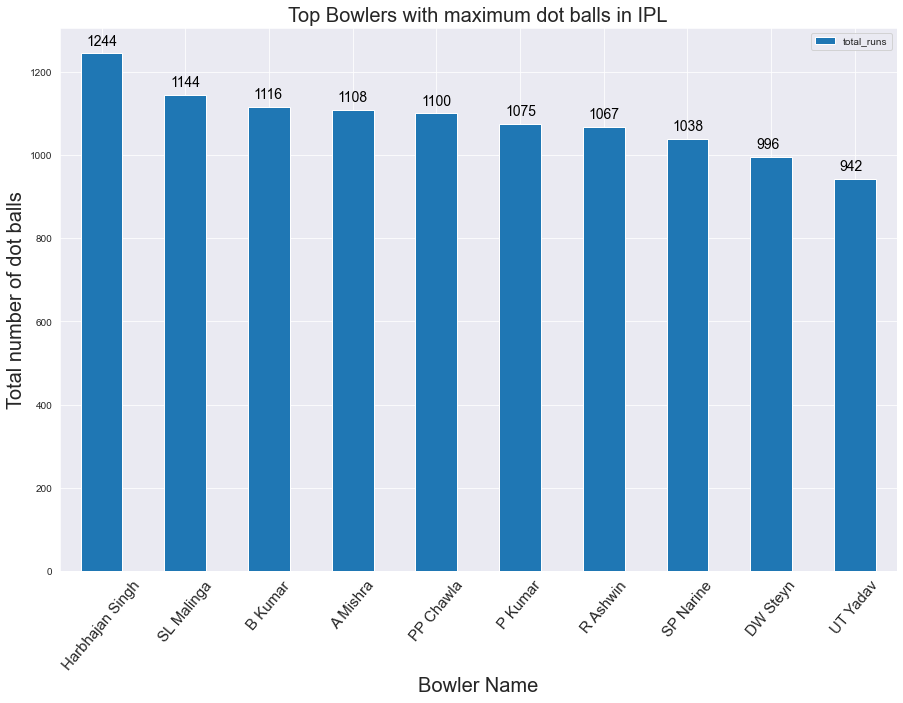

In [186]:
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('darkgrid')
sns.set_palette(palette='tab20')
df_new=df_deliveries.groupby(['bowler'])[['total_runs']].apply(lambda x: (x==0).sum())
ax=df_new.sort_values(by='total_runs',ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=50,fontsize=15)
plt.ylabel('Total number of dot balls',fontsize=20)
plt.xlabel('Bowler Name',fontsize=20)
plt.title('Top Bowlers with maximum dot balls in IPL',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.07,i.get_height()+20),color='black',
                fontsize=14)
plt.show()

* Harbhajan Singh has bowled the maximum of 1244 dot balls.
* SL Malinga has the second place with 1144 dot balls.
* B Kumar has the third place with 1116 dot balls.

Top Bowlers who conceded maximum sixes in IPL:

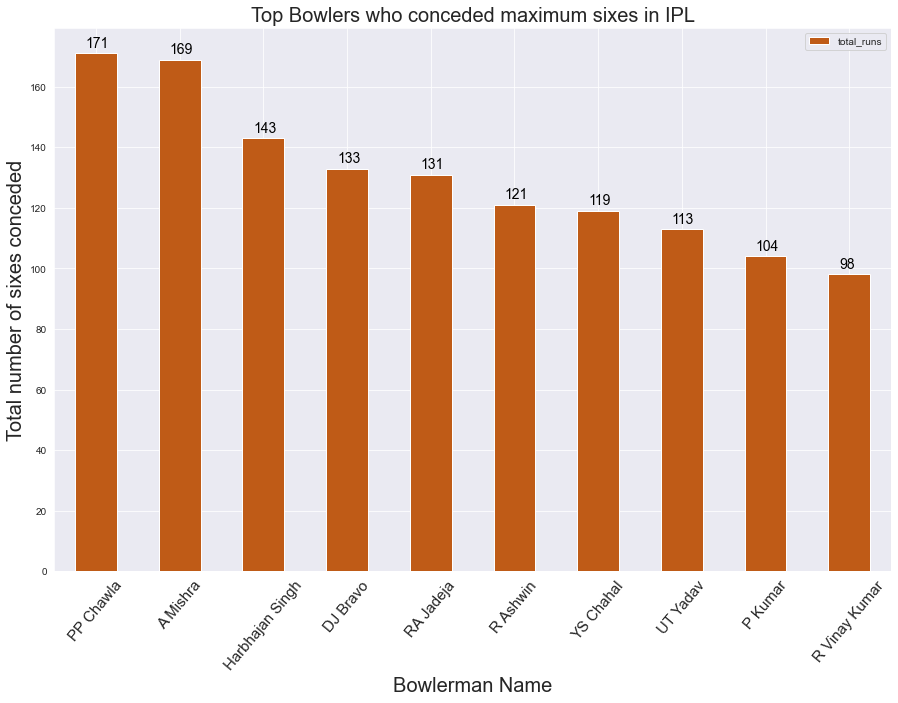

In [187]:
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('darkgrid')
sns.set_palette(palette='Accent_r')
df_new=df_deliveries.groupby(['bowler'])[['total_runs']].apply(lambda x: (x==6).sum())
ax=df_new.sort_values(by='total_runs',ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=50,fontsize=15)
plt.ylabel('Total number of sixes conceded',fontsize=20)
plt.xlabel('Bowlerman Name',fontsize=20)
plt.title('Top Bowlers who conceded maximum sixes in IPL',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.13,i.get_height()+2),color='black',
                fontsize=14)
plt.show()

* PP Chawla has conceded the maximum number of 171 sixes.
* A Mishra has the second place and has conceded the maximum number of 169 sixes.
* Harbhajan Singh has the third place and has conceded the maximum number of 143 sixes.

Top Bowlers who conceded maximum fours in IPL:

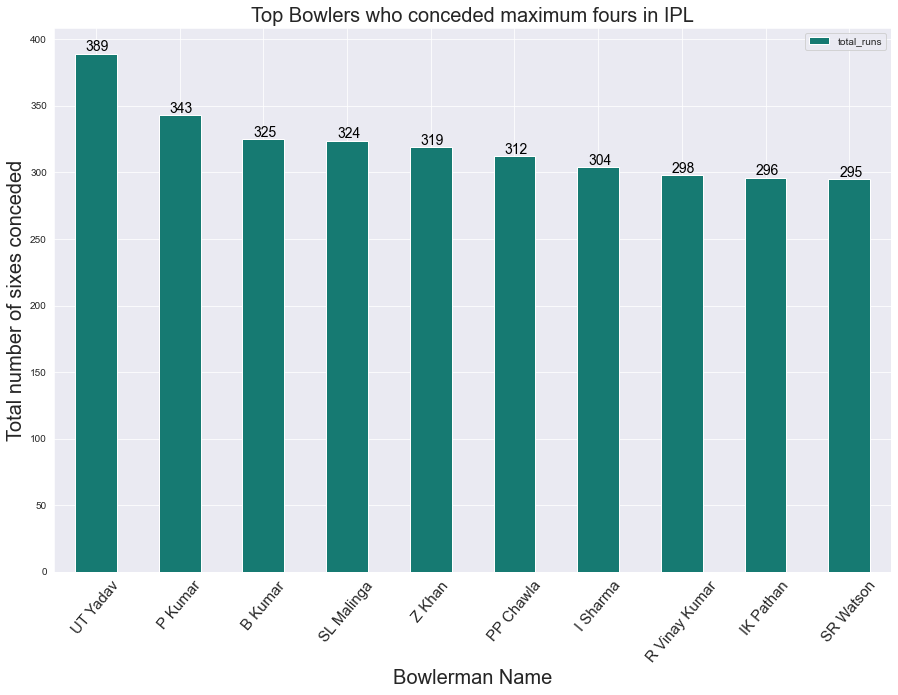

In [194]:
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('darkgrid')
sns.set_palette(palette='BrBG_r')
df_new=df_deliveries.groupby(['bowler'])[['total_runs']].apply(lambda x: (x==4).sum())
ax=df_new.sort_values(by='total_runs',ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=50,fontsize=15)
plt.ylabel('Total number of sixes conceded',fontsize=20)
plt.xlabel('Bowlerman Name',fontsize=20)
plt.title('Top Bowlers who conceded maximum fours in IPL',fontsize=20)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.13,i.get_height()+2),color='black',
                fontsize=14)
plt.show()

* UT Yadav has conceded the maximum number of 389 fours.
* P Kumar has the second place and has conceded the maximum number of 343 fours.
* B Kumar has the third place and has conceded the maximum number of 325 fours.